<a href="https://colab.research.google.com/github/Nodis6/Implementation-of-financial-models/blob/main/Impl_mod_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Usefull functions

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.plotting import heatmap
import seaborn
from sklearn.preprocessing import StandardScaler #standaryzacja min max
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn import metrics
import seaborn as sns

In [ ]:
def tree_scores(Classifier, X_train, X_test, y_train, y_test):
  from sklearn.metrics import recall_score
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  y_train_pred = Classifier.predict(X_train)
  print("Training:")
  print("Accuracy: %0.3f" % (accuracy_score(y_true=y_train, y_pred=y_train_pred)))
  print("Recall: %0.3f" % (recall_score(y_true=y_train, y_pred=y_train_pred)))


  y_test_pred = Classifier.predict(X_test)
  print("\nTest:")
  print("Accuracy: %0.3f" % (accuracy_score(y_true=y_test, y_pred=y_test_pred)))
  print("Recall: %0.3f" % (recall_score(y_true=y_test, y_pred=y_test_pred)))

In [ ]:
def scores(Classifier, X_train, X_test, y_train, y_test): # należy przenieść tę funkcję wyżej
  from sklearn.metrics import recall_score
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  y_train_pred = Classifier.predict(X_train)
  print("Training:")
  print("Accuracy: %0.3f" % (accuracy_score(y_true=y_train, y_pred=y_train_pred)))
  print("Recall: %0.3f" % (recall_score(y_true=y_train, y_pred=y_train_pred)))
  y_score = Classifier.decision_function(X_train)
  print("AUC: %0.3f" % (roc_auc_score(y_train, y_score)))

  y_test_pred = Classifier.predict(X_test)
  print("\nTest:")
  print("Accuracy: %0.3f" % (accuracy_score(y_true=y_test, y_pred=y_test_pred)))
  print("Recall: %0.3f" % (recall_score(y_true=y_test, y_pred=y_test_pred)))
  y_score = Classifier.decision_function(X_test)
  print("AUC: %0.3f" % (roc_auc_score(y_test, y_score)))

# Preprocessing

In [ ]:
pd.set_option('display.max_columns', None)
# pd.reset_option('max_columns')
data  = pd.read_csv('https://raw.githubusercontent.com/INTQuant-Katowice/AGH-2024/main/Data/data_20200311_proj4.csv')

In [ ]:
data.head()

,age_x,age_y,credit_history,kids,household_income,outstanding_loan_amount,property_value,property_size,annual_interest_rate,monthly_payment,n,Default
0,34,31.0,1,1,8617,149217,765952,101.37,4.84,1669,112,False
1,31,NaN,1,1,7502,138054,361017,75.04,4.83,2852,54,False
2,32,NaN,1,1,3274,73614,193800,32.92,4.41,1226,68,False
3,38,32.0,1,2,8167,157986,560277,118.98,4.55,1787,108,False
4,29,27.0,1,1,9007,290948,470490,61.98,4.65,2175,189,False


In [ ]:
data

,age_x,age_y,credit_history,kids,household_income,outstanding_loan_amount,property_value,property_size,annual_interest_rate,monthly_payment,n,Default
0,34,31.0,1,1,8617,149217,765952,101.37,4.84,1669,112,False
1,31,NaN,1,1,7502,138054,361017,75.04,4.83,2852,54,False
2,32,NaN,1,1,3274,73614,193800,32.92,4.41,1226,68,False
3,38,32.0,1,2,8167,157986,560277,118.98,4.55,1787,108,False
4,29,27.0,1,1,9007,290948,470490,61.98,4.65,2175,189,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8538,27,NaN,0,0,5882,98797,437462,82.40,4.30,1805,62,False
8539,20,NaN,0,0,2926,156506,249570,37.40,4.69,947,267,True
8540,47,46.0,1,3,12856,438244,750280,97.68,5.10,2917,240,False
8541,37,35.0,1,2,6545,168324,288494,56.49,4.11,1481,145,False


In [ ]:
data["Default"] = data["Default"].astype(int)

In [ ]:
print(data.isna().sum())

age_x                         0
age_y                      2471
credit_history                0
kids                          0
household_income              0
outstanding_loan_amount       0
property_value                0
property_size                 0
annual_interest_rate          0
monthly_payment               0
n                             0
Default                       0
dtype: int64


The only missing values are in the age_y column. This could mean that the person took the loan alone. We will address this problem later, after a more thorough analysis.

In [ ]:
data[['age_x', 'age_y', 'household_income', 'outstanding_loan_amount', 'property_value', 'property_size', 'annual_interest_rate', 'monthly_payment', 'n']].describe()

,age_x,age_y,household_income,outstanding_loan_amount,property_value,property_size,annual_interest_rate,monthly_payment,n
count,8543.000000,6072.000000,8543.000000,8543.000000,8.543000e+03,8543.000000,8543.000000,8543.000000,8543.000000
mean,35.065785,33.121542,7482.299778,172584.443755,4.882355e+05,74.843529,4.790322,1929.881306,130.218659
std,4.979412,5.814096,3357.314964,124237.900605,2.578425e+05,39.441491,0.396393,932.440431,87.656334
min,20.000000,12.000000,2001.000000,462.000000,1.043410e+05,25.010000,4.010000,180.000000,1.000000
25%,32.000000,29.000000,4931.500000,82442.000000,2.897885e+05,44.010000,4.480000,1231.000000,61.000000
50%,35.000000,33.000000,7015.000000,140839.000000,4.339290e+05,66.360000,4.770000,1789.000000,108.000000
75%,38.000000,37.000000,9449.500000,232869.000000,6.230650e+05,96.040000,5.080000,2467.000000,184.000000
max,52.000000,54.000000,24419.000000,978563.000000,2.227261e+06,297.790000,5.960000,7286.000000,360.000000


From the above summary, we can see that there are no suspicious values in the selected columns. Despite this, we can see a large jump between the third quantile and the maximum values, which means that outliers may appear.

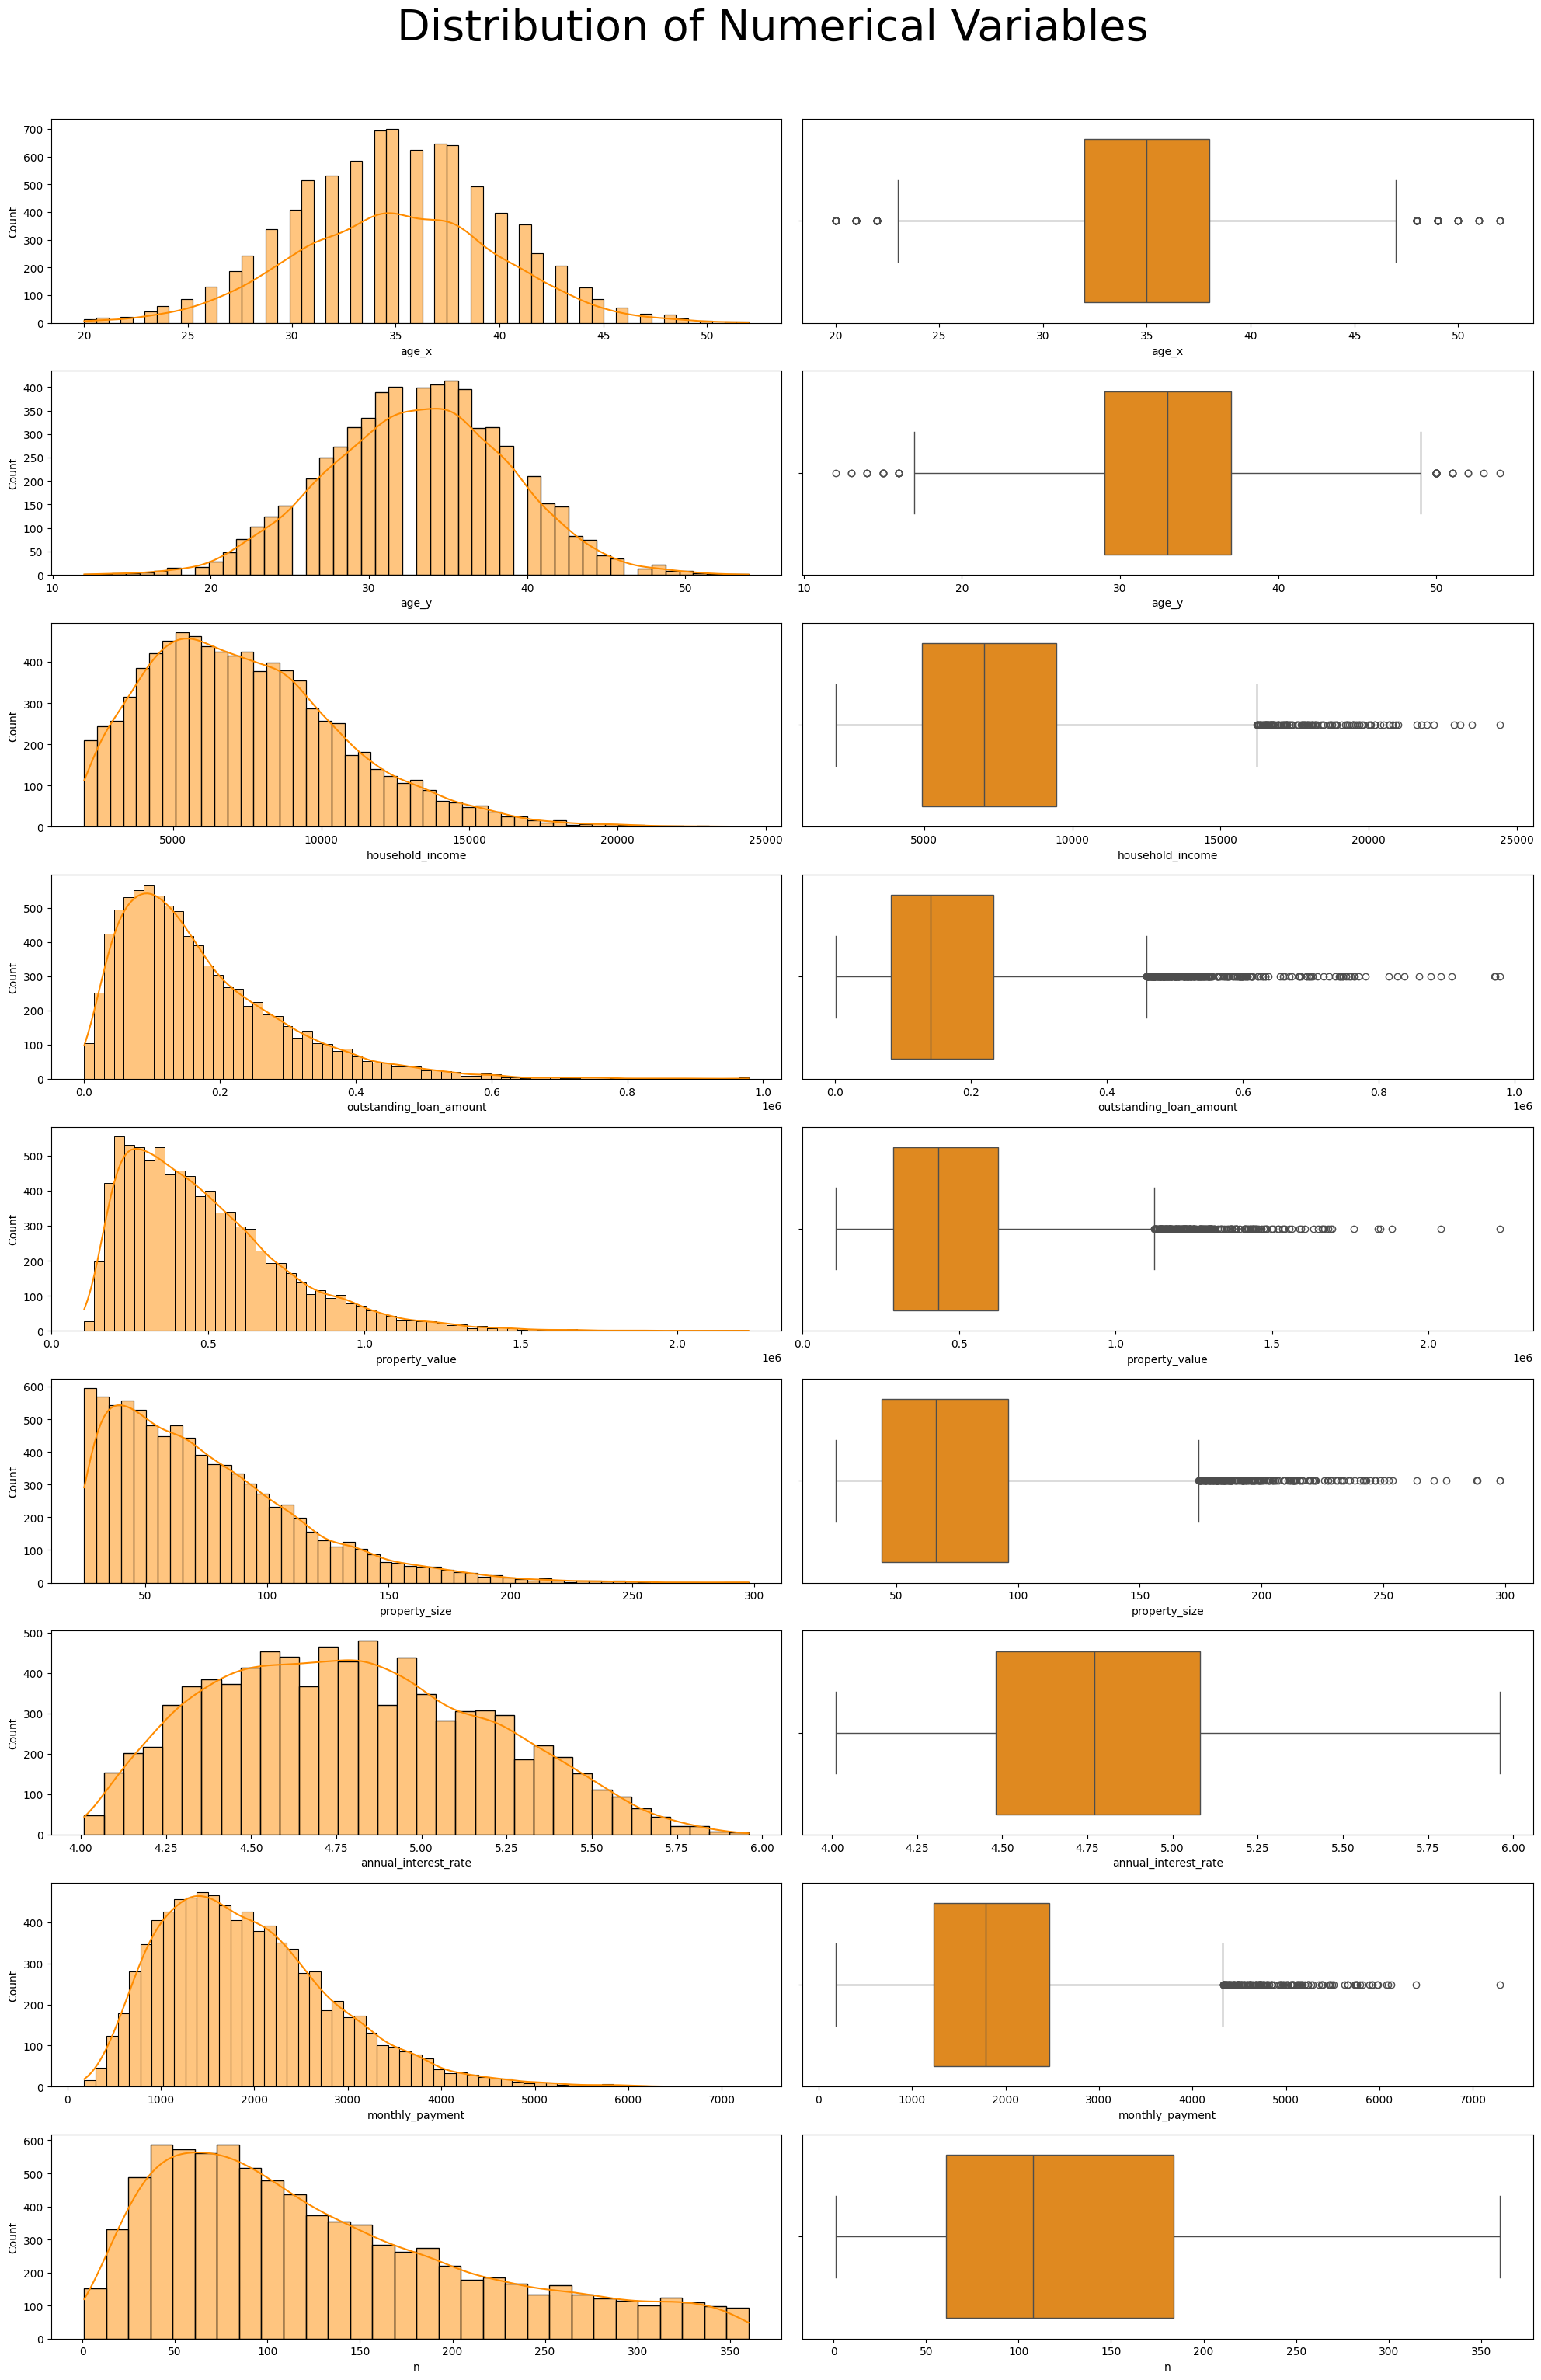

In [ ]:
plt.figure(figsize=(20, 30))
plotnumber = 1

# Select numerical columns with more than 5 unique values
num_columns = [col for col in data.columns if data[col].nunique() > 5]

# Create subplots for histograms and horizontal boxplots
for col in num_columns:
    # Histogram
    plt.subplot(len(num_columns), 2, plotnumber)
    sns.histplot(data[col], kde=True, color='darkorange')
    plt.xlabel(col)
    plotnumber += 1

    # Boxplot
    plt.subplot(len(num_columns), 2, plotnumber)
    sns.boxplot(x=data[col], color='darkorange', width=0.8, linewidth=1)
    plt.xlabel(col)
    plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1.02)
plt.tight_layout()
plt.show()

We notice that the variable age_y is in the range from 12 to 54. It is likely that this is a variable that tells about many partner. Someone might have mistakenly entered the wrong number there, or the age of their child, for example. We decide to remove numbers that are too small, i.e. those that are smaller than 18.

In addition, we see a lot of outliers. Although outliers are usually avoided in logistic regression assumptions, in this case the outliers make sense and there is no reason to reject them from the model.

<Axes: >

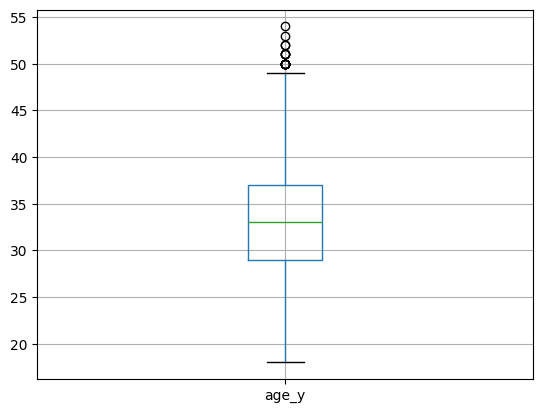

In [ ]:
data['age_y'] = data['age_y'].apply(lambda x: np.nan if x < 18 else x)

data.boxplot(["age_y"])

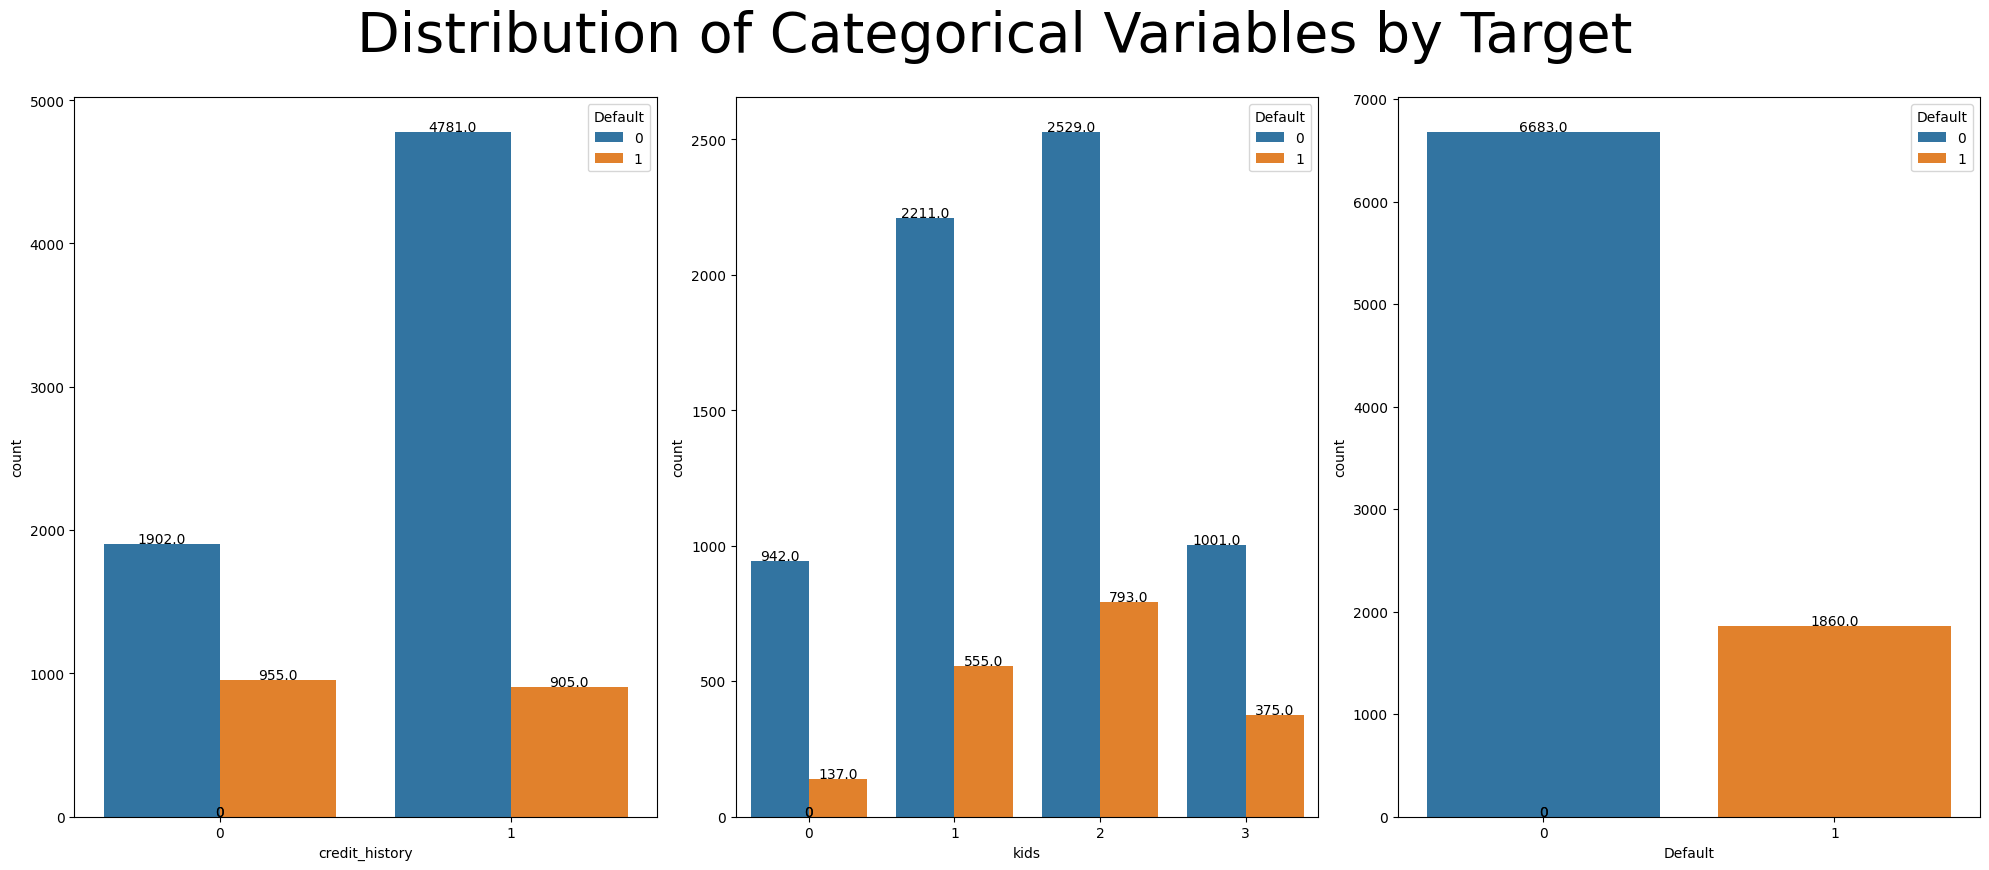

In [ ]:
import seaborn as sns

# Increase the figure size
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in data.columns:
    # Check if the number of unique values is less than 5
    if data[col].nunique() < 5:
        if plotnumber <= 6:
            plt.subplot(2, 3, plotnumber)
            ax = sns.countplot(x=data[col], hue=data['Default'], palette='tab10')

            # Add labels to each bar in the plot
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width() / 2.,
                        p.get_height() + 3,
                        f'{p.get_height()}',
                        ha="center")

        plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize=40, y=1)
plt.tight_layout()
plt.show()

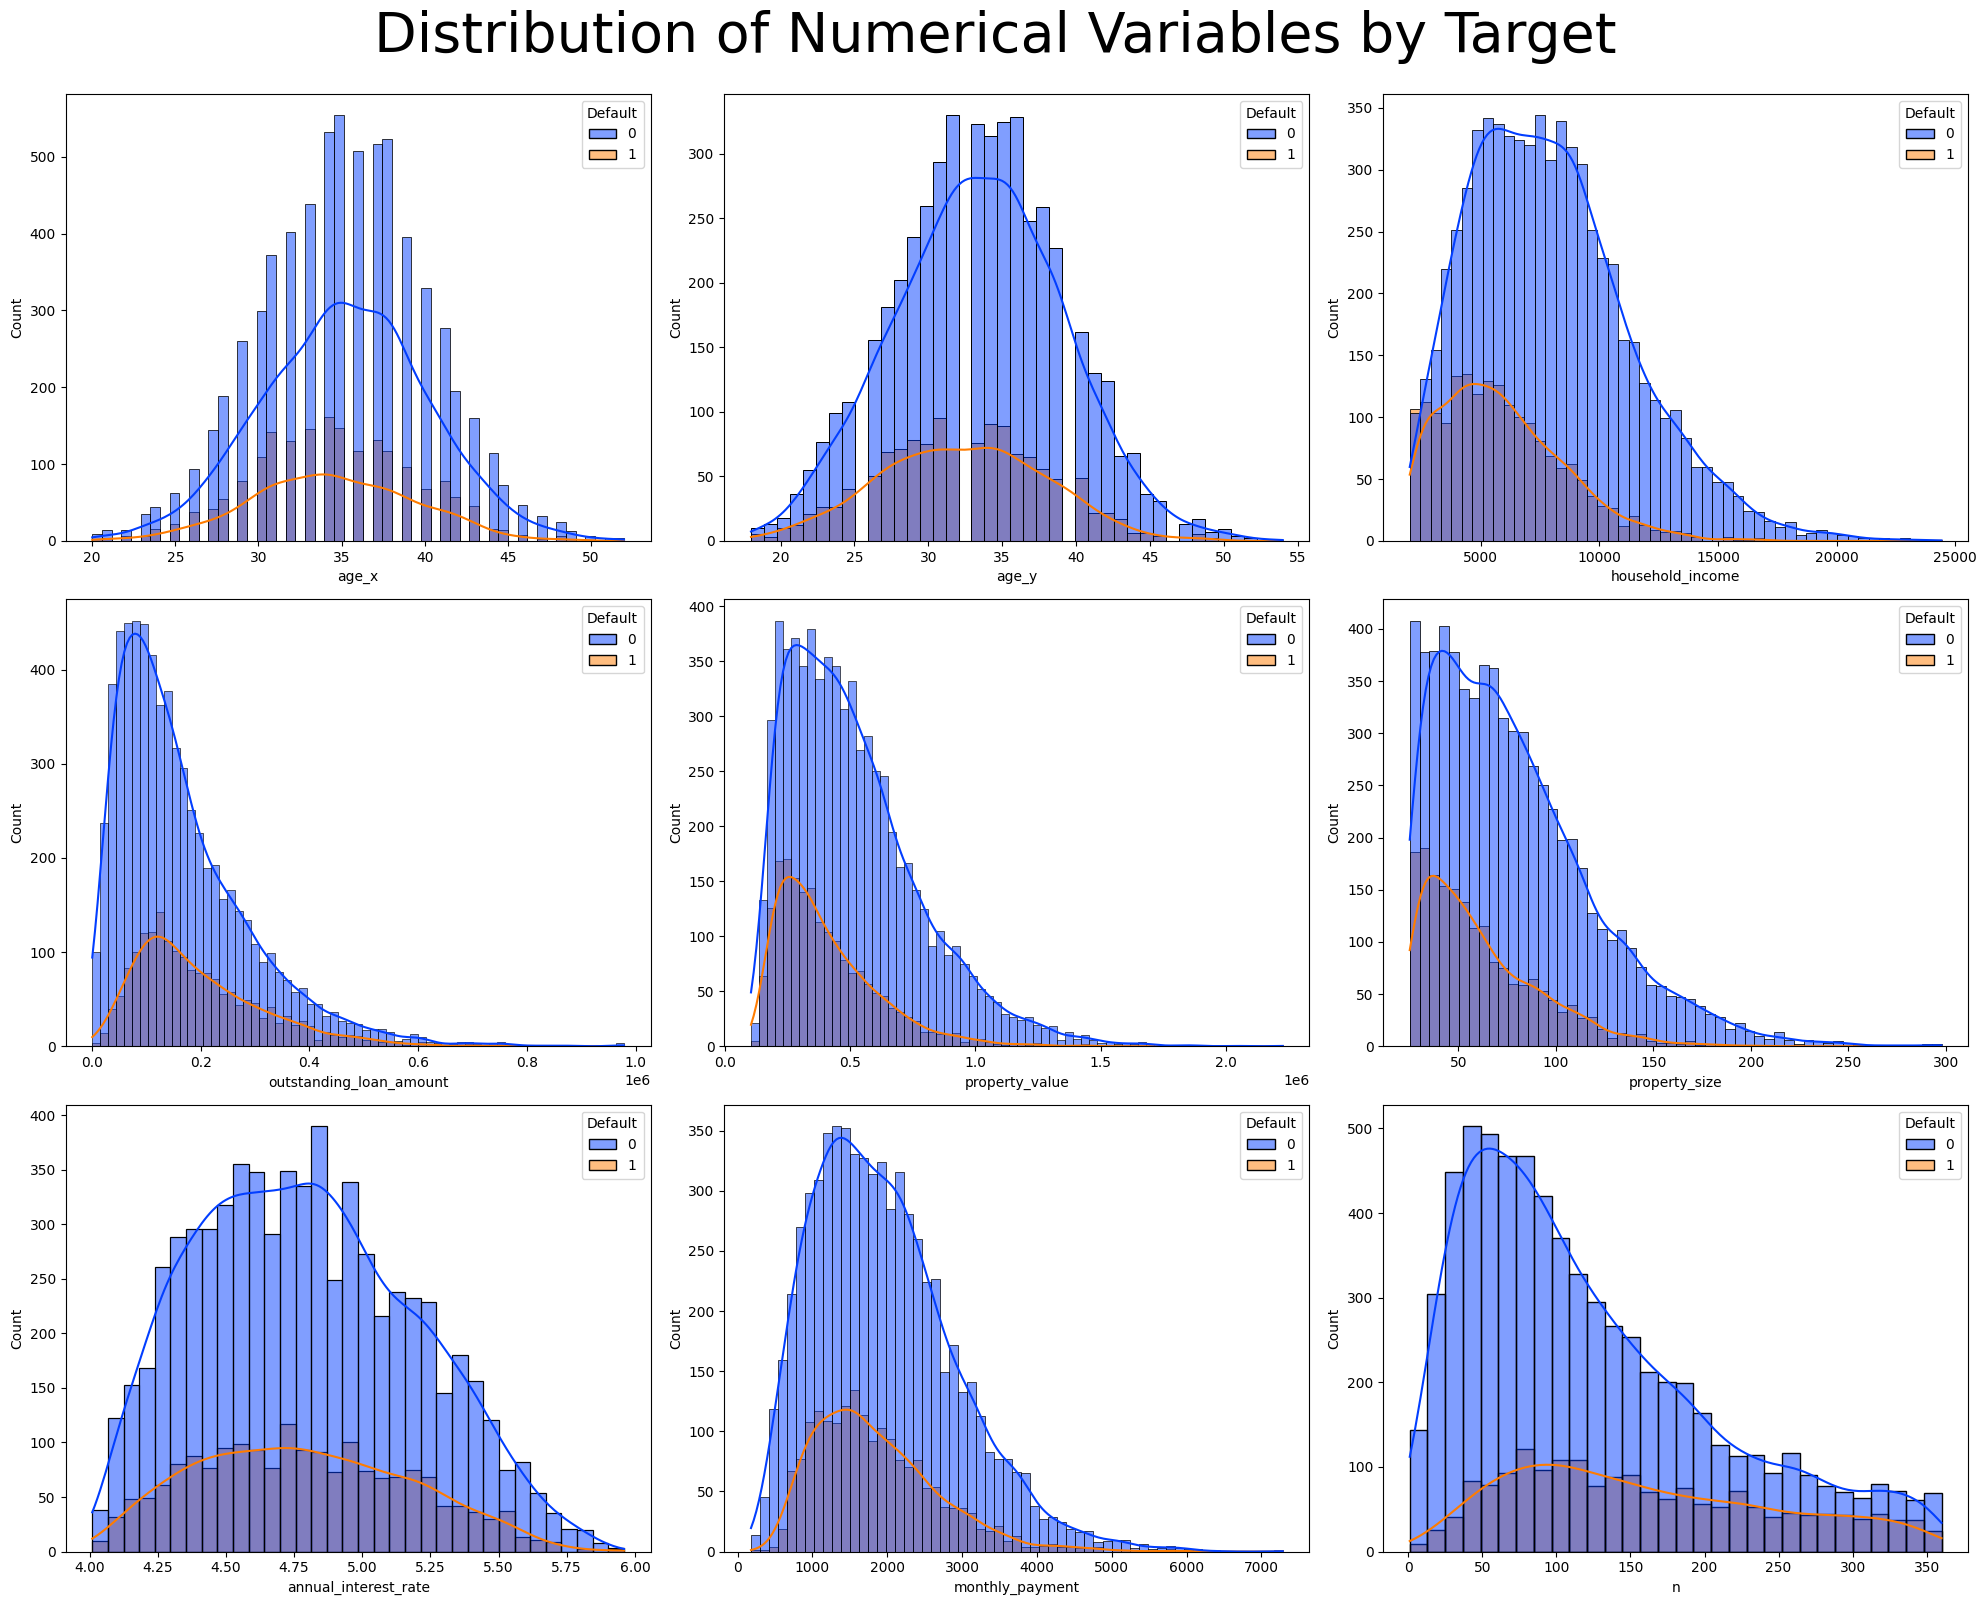

In [ ]:
# Increase the figure size
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in data.columns:
    # Check if the number of unique values is more than 5
    if data[col].nunique() > 5:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(data=data, x=col, hue='Default', kde=True, palette='bright')  # Use 'hue' to differentiate by target
        plt.xlabel(col)
        plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables by Target', fontsize=40, y=1)
plt.tight_layout()
plt.show()

Pairplot is commented as it takes a lot of time to perform.

In [ ]:
# seaborn.pairplot(data = data, hue = "Default")

Collinearity occurs in the following pairs:

* age x and age y - Solution : we will test two models.

 1. we will divide the set into two parts - people who take credit alone or in a couple
 2 We will count the average age x and y and add a column whether someone takes credit in two or alone. Then we will remove the x and y columns.

* property value and property size - we will divide value by size to have a square meter value.

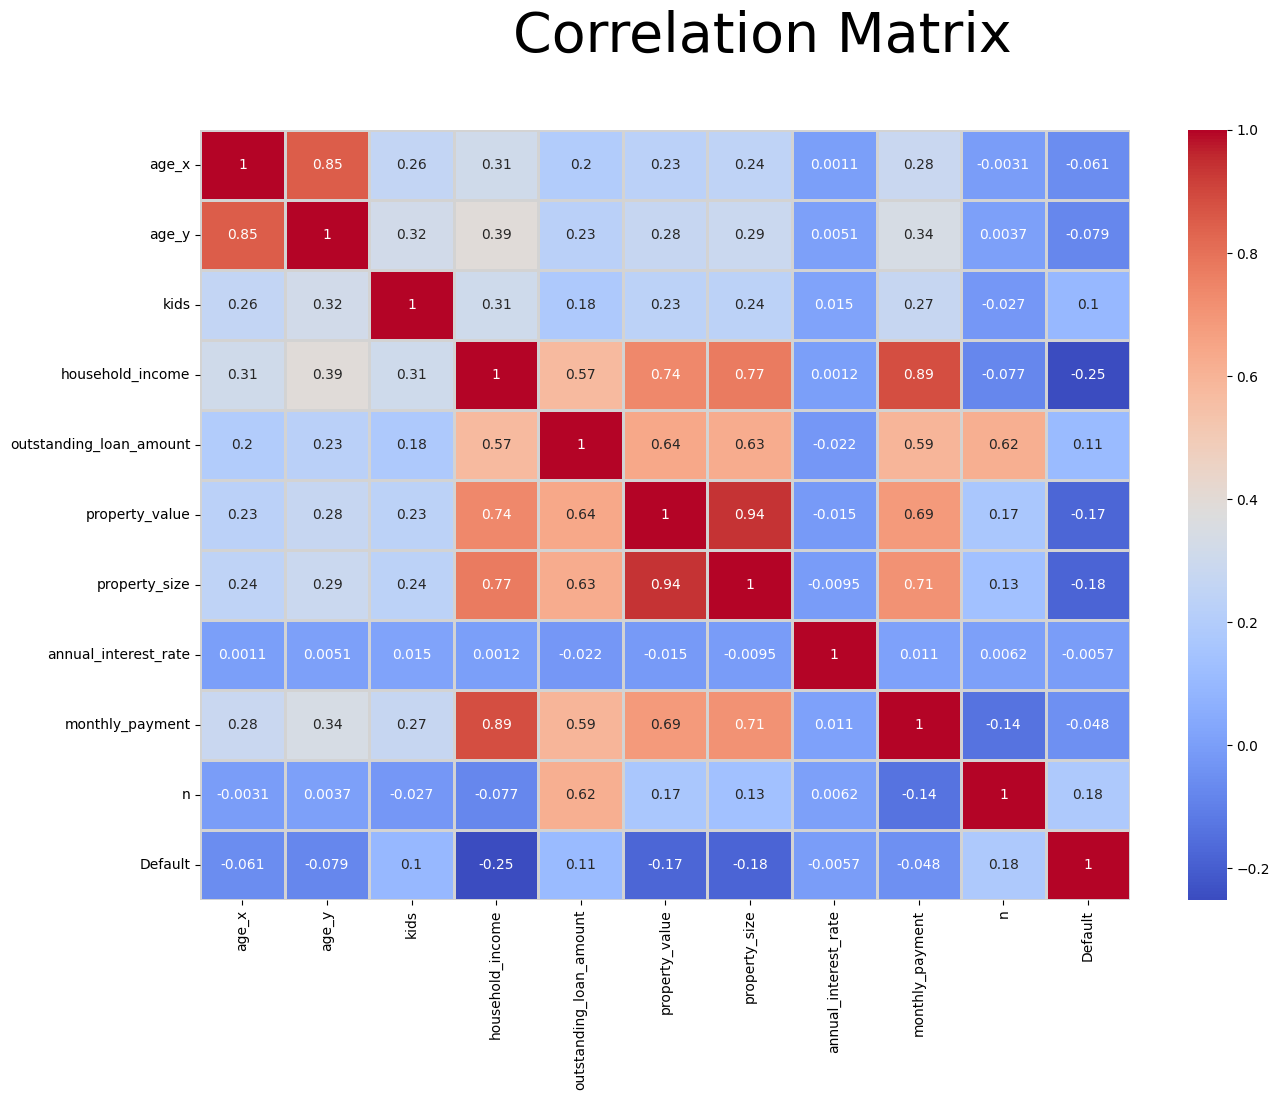

In [ ]:
cols = [
    "age_x", "age_y",
    # "credit_history", # Ta kolumna jest zakomentowana
    "kids", "household_income", "outstanding_loan_amount",
    "property_value", "property_size", "annual_interest_rate",
    "monthly_payment", "n", "Default"
]

filtered_data = data[cols]

corr_matrix = filtered_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In the assumptions for logistic regression, it is mentioned that a correlation below 0.9 will not adversely affect the model. We will now perform a data manipulation to get rid of the higher correlation.

In [ ]:
new_data = data.copy()
new_data["value_of_square_meter"] = new_data["property_value"]/new_data["property_size"]
new_data.drop(["property_value", "monthly_payment"], axis=1,inplace=True)
new_data.head()

,age_x,age_y,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,Default,value_of_square_meter
0,34,31.0,1,1,8617,149217,101.37,4.84,112,0,7556.002762
1,31,NaN,1,1,7502,138054,75.04,4.83,54,0,4810.994136
2,32,NaN,1,1,3274,73614,32.92,4.41,68,0,5886.998785
3,38,32.0,1,2,8167,157986,118.98,4.55,108,0,4709.001513
4,29,27.0,1,1,9007,290948,61.98,4.65,189,0,7590.997096


<Axes: >

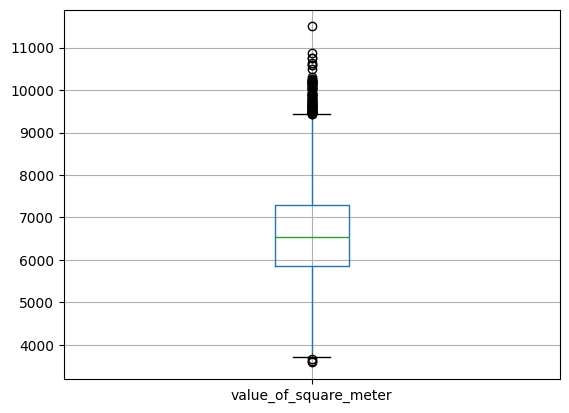

In [ ]:
new_data.boxplot(["value_of_square_meter"])

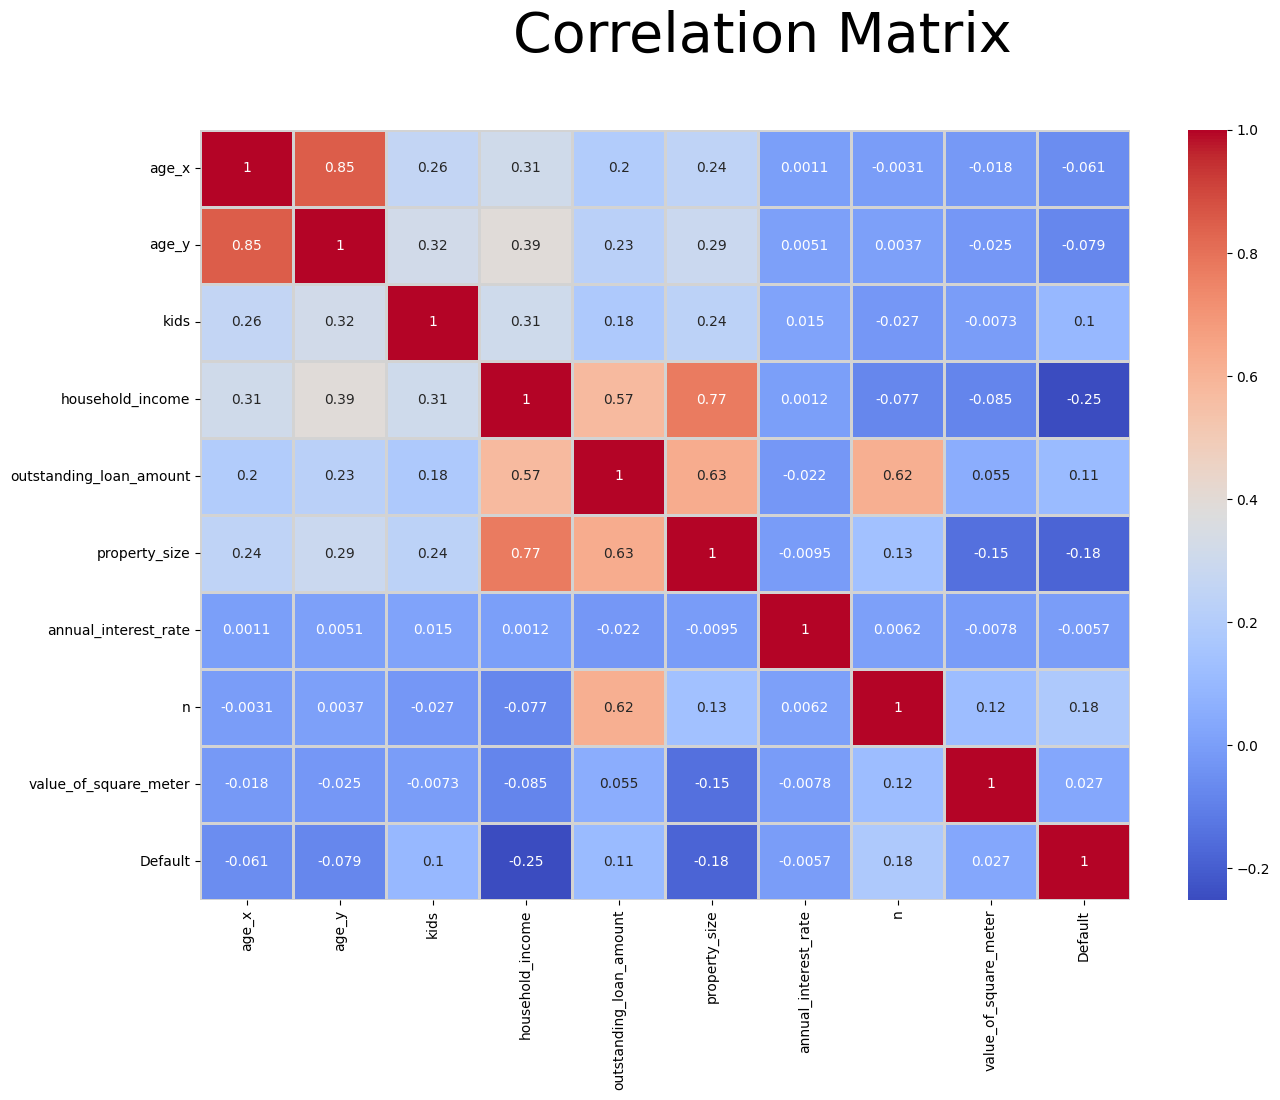

In [ ]:
cols = [
    "age_x", "age_y",
    # "credit_history", # Ta kolumna jest zakomentowana
    "kids", "household_income", "outstanding_loan_amount", "property_size", "annual_interest_rate", "n", "value_of_square_meter","Default"
]

filtered_data = new_data[cols]

corr_matrix = filtered_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

# Approach 1 - Dividing the data into two parts.

In [ ]:
data_with_y = new_data.dropna()
data_no_y = new_data[new_data.isna().any(axis=1)]
data_no_y = data_no_y.drop("age_y", axis = 1)

In [ ]:
np.shape(new_data), np.shape(data_with_y), np.shape(data_no_y)

((8543, 11), (6048, 11), (2495, 10))

In [ ]:
data_with_y.head()

,age_x,age_y,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,Default,value_of_square_meter
0,34,31.0,1,1,8617,149217,101.37,4.84,112,0,7556.002762
3,38,32.0,1,2,8167,157986,118.98,4.55,108,0,4709.001513
4,29,27.0,1,1,9007,290948,61.98,4.65,189,0,7590.997096
6,36,36.0,1,3,8918,286577,103.46,4.45,260,0,7430.001933
7,36,36.0,1,1,12635,258568,157.26,4.34,76,0,7739.997456


In [ ]:
data_no_y.head()

,age_x,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,Default,value_of_square_meter
1,31,1,1,7502,138054,75.04,4.83,54,0,4810.994136
2,32,1,1,3274,73614,32.92,4.41,68,0,5886.998785
5,39,0,0,6395,97464,50.36,4.58,68,0,6291.004766
8,34,1,0,5722,232917,46.74,4.44,343,0,8574.005135
9,39,0,1,4571,95836,25.57,4.55,140,0,6766.014861


## Model for couples

In [ ]:
sc = StandardScaler()
X = data_with_y.drop(columns = "Default")
y = data_with_y["Default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1, stratify = y)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
np.shape(X)

(6048, 10)

<Axes: >

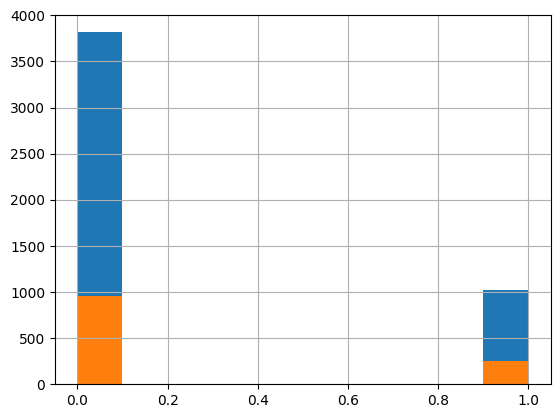

In [ ]:
y_train.hist()
y_test.hist()

We note that for Default = 1 we have much less data. So we will use the upsampling method.

In [ ]:
X_upsampled, y_upsampled = resample(X_train_std[y_train == 1], y_train[y_train == 1],
                                    replace=True, n_samples=X_train_std[y_train == 0].shape[0], random_state=13)

In [ ]:
X_train = np.vstack((X_train_std[y_train == 0], X_upsampled))
y_train = np.hstack((y_train[y_train == 0], y_upsampled))

In [ ]:
np.shape(X_train), np.shape(X_test_std), np.shape(y_train), np.shape(y_test)

((7632, 10), (1210, 10), (7632,), (1210,))

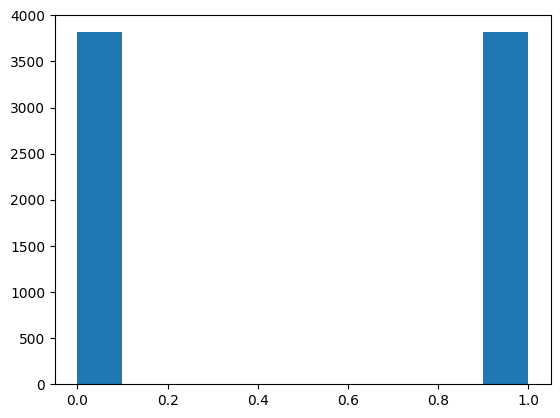

In [ ]:
plt.hist(y_train)
plt.show()



### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

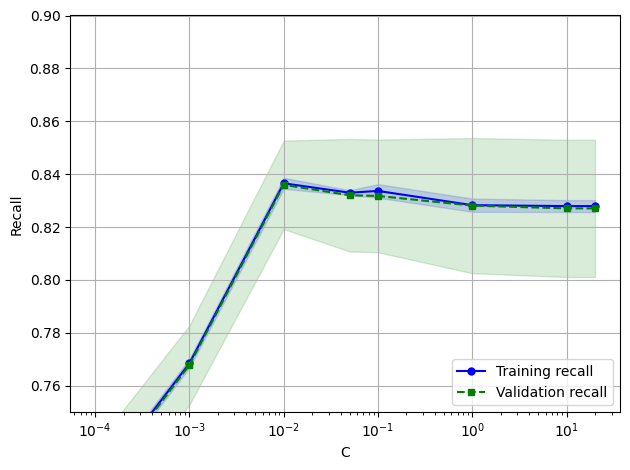

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.0001 ,0.001, 0.01, 0.05, 0.1, 1.0, 10.0, 20.0]
train_scores, valid_scores = validation_curve(
                estimator=LogisticRegression(max_iter=10000),
                X=X_train,
                y=y_train,
                param_name='C',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training recall')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, valid_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall')

plt.fill_between(param_range,
                 valid_mean + valid_std,
                 valid_mean - valid_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Recall')
plt.ylim([0.75, 0.9])
plt.tight_layout()

plt.show()

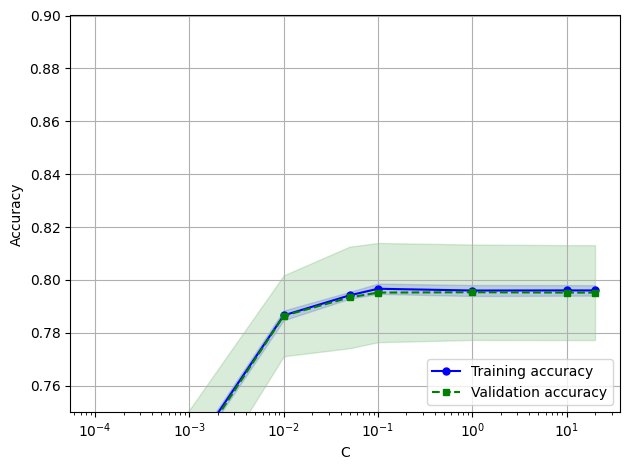

In [ ]:
param_range = [0.0001 ,0.001, 0.01, 0.05,0.1, 1.0, 10.0, 20.0]
train_scores, valid_scores = validation_curve(
                estimator=LogisticRegression(max_iter=10000),
                X=X_train,
                y=y_train,
                param_name='C',
                param_range=param_range,
                cv=10,
                scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, valid_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 valid_mean + valid_std,
                 valid_mean - valid_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.tight_layout()

plt.show()

Based on these two graphs, we choose C = 0.1.

In [ ]:
lr = LogisticRegression(random_state=13, C = 0.1)
lr = lr.fit(X_train, y_train)

Training:
Accuracy: 0.796
Recall: 0.831
AUC: 0.875

Test:
Accuracy: 0.788
Recall: 0.827
AUC: 0.875


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


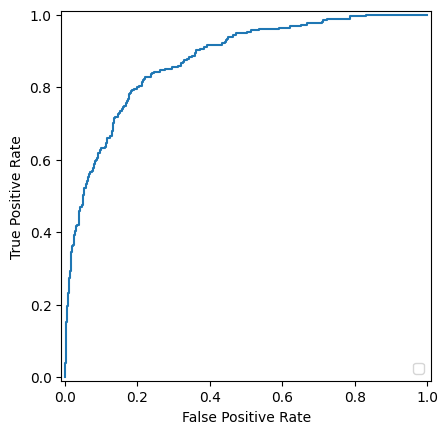

In [ ]:
scores(lr, X_train, X_test_std, y_train, y_test)

y_score = lr.decision_function(X_test_std)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fp_rate, tpr=tp_rate)
roc_display.plot();

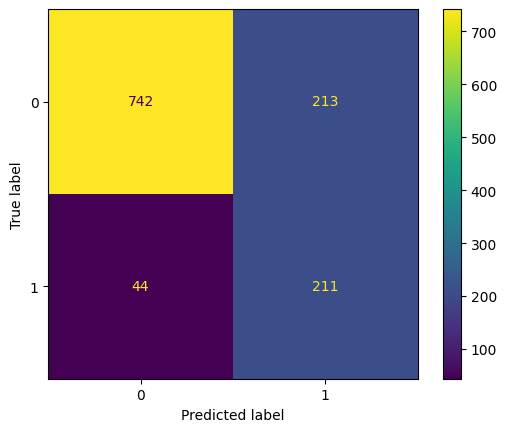

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
y_pred = lr.predict(X_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(y_test, y_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

<BarContainer object of 10 artists>

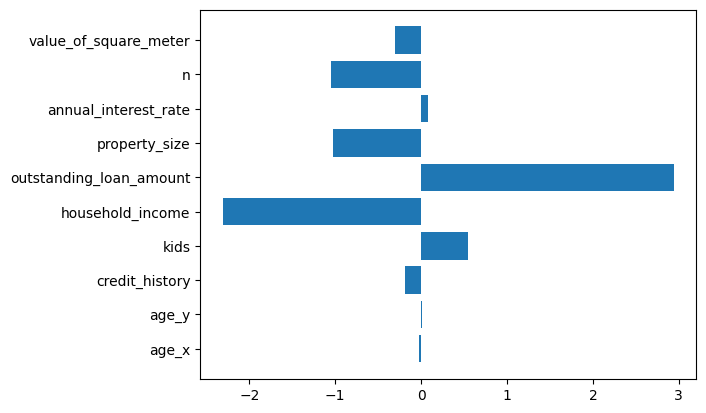

In [ ]:
plt.barh(np.arange(len(X.columns)), lr.coef_[0], tick_label = X.columns)

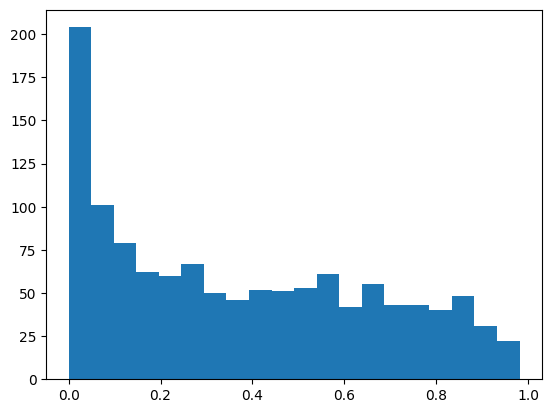

In [ ]:
pd_rodzinnie = lr.predict_proba(X_test_std)
pd_rodzinnie[:,1]

plt.hist(pd_rodzinnie[:,1], bins = 20)
plt.show()

### Decision tree

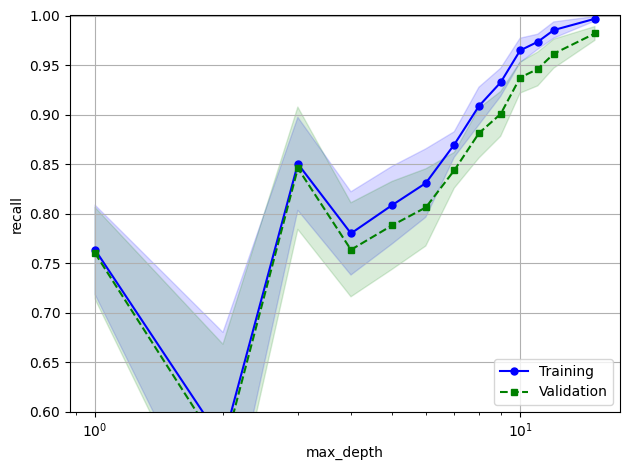

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model= DecisionTreeClassifier()
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,15]
train_scores, test_scores = validation_curve(
                estimator=tree_model,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
param_grid = {
    "max_depth": [2,3,4,5,7,8,9],
    "min_samples_leaf": [1,2,3,4,5],
    "max_features": [1,2,3,4,5],
    "min_samples_split": [2,3,4,5,6],
    "random_state": [13]
}

grid_model= GridSearchCV(estimator= tree_model, param_grid = param_grid, scoring = "accuracy")

grid_model.fit(X_train, y_train)
grid_model.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 13}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 9, # controls the maximum depth of the decision tree
                                    max_features = 5, # determines the maximum number of features to consider when looking for the best split
                                    min_samples_leaf = 1, #  specifies the minimum number of samples required to be at a leaf node
                                    min_samples_split = 4,
                                    random_state = 13)

# tree_model = DecisionTreeClassifier(criterion = 'gini',  max_depth = 9, random_state = 13)

tree_model.fit(X_train, y_train)

# y_test_pred = tree_model.predict(X_test_std)
# y_train_pred = tree_model.predict(X_train)

tree_scores(tree_model, X_train, X_test_std, y_train, y_test)

Training:
Accuracy: 0.865
Recall: 0.916

Test:
Accuracy: 0.735
Recall: 0.667


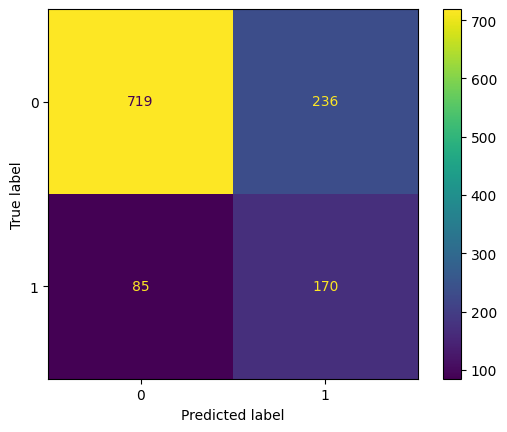

In [ ]:
# draw a confusion matrix - import dedicated packages
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
y_pred = tree_model.predict(X_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(y_test, y_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

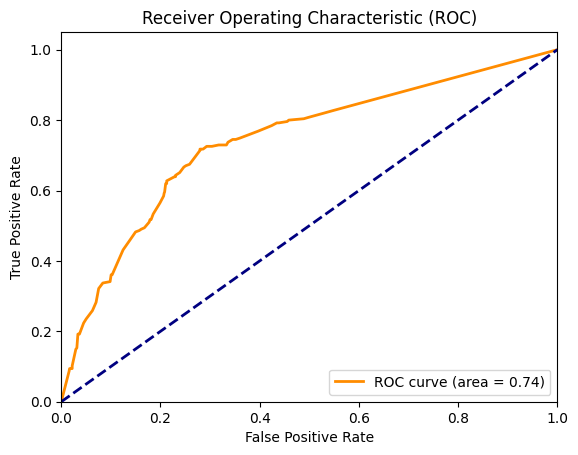

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = tree_model.predict_proba(X_test_std)[:, 1]  # Prawdopodobieństwo dla klasy pozytywnej
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

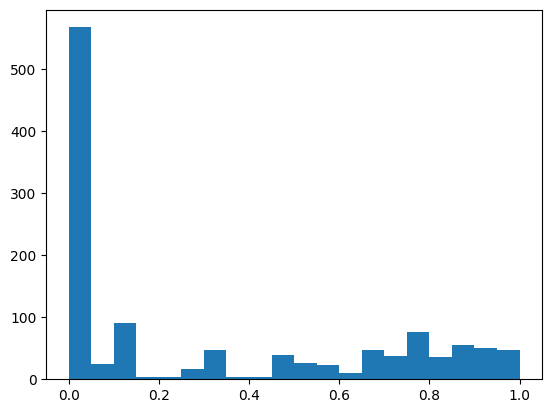

In [ ]:
pd_2_tree = tree_model.predict_proba(X_test_std)
pd_2_tree[:,1]

plt.hist(pd_2_tree[:,1], bins = 20)
plt.show()

## Model for singles

In [ ]:
sc = StandardScaler()
Xno = data_no_y.drop(columns = "Default")
yno = data_no_y["Default"]
Xno_train, Xno_test, yno_train, yno_test = train_test_split(Xno, yno, test_size = 0.20, random_state= 1, stratify = yno)
Xno_train_std = sc.fit_transform(Xno_train)
Xno_test_std = sc.transform(Xno_test)

In [ ]:
Xno.head()

,age_x,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,value_of_square_meter
1,31,1,1,7502,138054,75.04,4.83,54,4810.994136
2,32,1,1,3274,73614,32.92,4.41,68,5886.998785
5,39,0,0,6395,97464,50.36,4.58,68,6291.004766
8,34,1,0,5722,232917,46.74,4.44,343,8574.005135
9,39,0,1,4571,95836,25.57,4.55,140,6766.014861


In [ ]:
np.shape(Xno), np.shape(yno)

((2495, 9), (2495,))

In [ ]:
np.shape(Xno_train_std), np.shape(Xno_test_std), np.shape(yno_train), np.shape(yno_test)

((1996, 9), (499, 9), (1996,), (499,))

In [ ]:
Xno_upsampled, yno_upsampled = resample(Xno_train_std[yno_train == 1], yno_train[yno_train == 1], replace=True,
                                        n_samples=Xno_train_std[yno_train == 0].shape[0], random_state=13)


In [ ]:
Xno_train = np.vstack((Xno_train_std[yno_train == 0], Xno_upsampled))
yno_train = np.hstack((yno_train[yno_train == 0], yno_upsampled))

In [ ]:
np.shape(Xno_train), np.shape(Xno_test_std), np.shape(yno_train), np.shape(yno_test)

((3060, 9), (499, 9), (3060,), (499,))

### Logistic regression

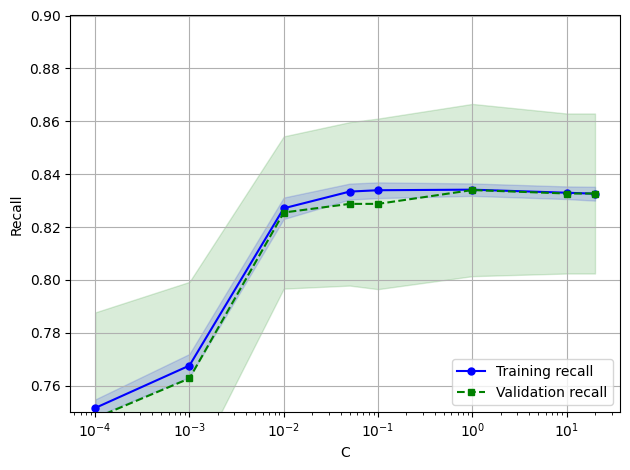

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.0001 ,0.001, 0.01, 0.05, 0.1, 1.0, 10.0, 20.0]
train_scores, valid_scores = validation_curve(
                estimator=LogisticRegression(),
                X=Xno_train,
                y=yno_train,
                param_name='C',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training recall')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, valid_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall')

plt.fill_between(param_range,
                 valid_mean + valid_std,
                 valid_mean - valid_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Recall')
plt.ylim([0.75, 0.9])
plt.tight_layout()

plt.show()

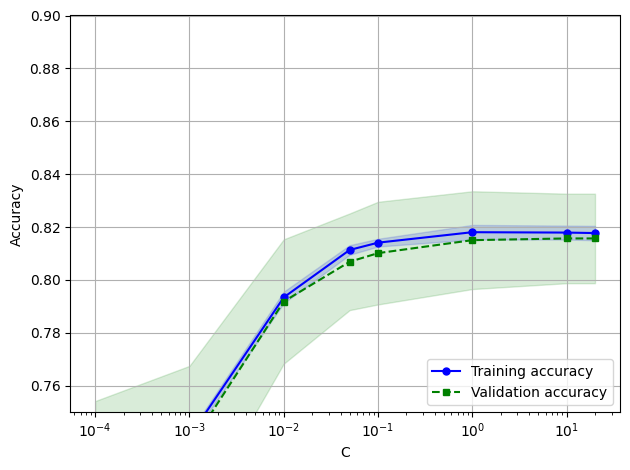

In [ ]:
param_range = [0.0001 ,0.001, 0.01, 0.05,0.1, 1.0, 10.0, 20.0]
train_scores, valid_scores = validation_curve(
                estimator=LogisticRegression(),
                X=Xno_train,
                y=yno_train,
                param_name='C',
                param_range=param_range,
                cv=10,
                scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, valid_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 valid_mean + valid_std,
                 valid_mean - valid_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.tight_layout()

plt.show()

In [ ]:
lr = LogisticRegression(random_state=13, C = 1)
lr = lr.fit(Xno_train, yno_train)

Training:
Accuracy: 0.819
Recall: 0.836
AUC: 0.906

Test:
Accuracy: 0.778
Recall: 0.769
AUC: 0.880


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


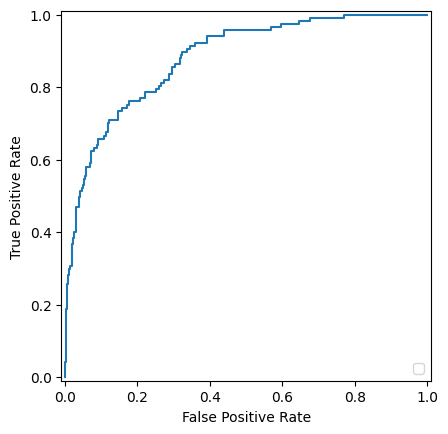

In [ ]:
scores(lr, Xno_train, Xno_test_std, yno_train, yno_test)

yno_score = lr.decision_function(Xno_test_std)
fp_rate, tp_rate, thresholds = roc_curve(yno_test, yno_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fp_rate, tpr=tp_rate)
roc_display.plot();

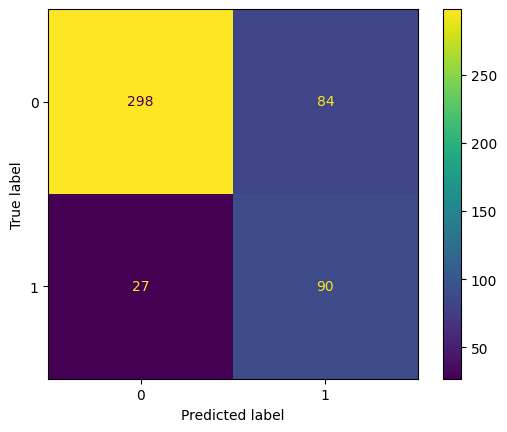

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
yno_pred = lr.predict(Xno_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(yno_test, yno_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

<BarContainer object of 9 artists>

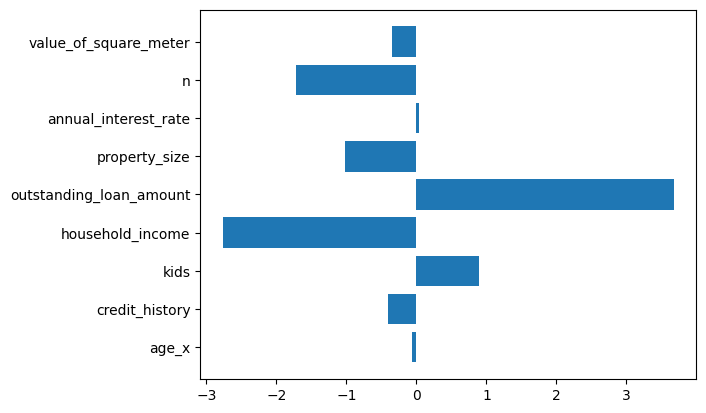

In [ ]:
plt.barh(np.arange(len(Xno.columns)), lr.coef_[0], tick_label = Xno.columns)

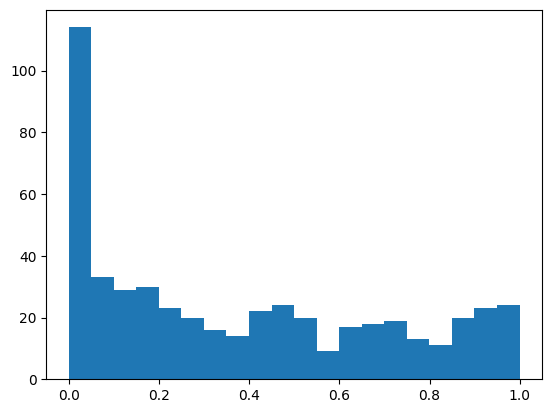

In [ ]:
pd_samotnie = lr.predict_proba(Xno_test_std)
pd_samotnie[:,1]

plt.hist(pd_samotnie[:,1], bins = 20)
plt.show()

### Decision tree

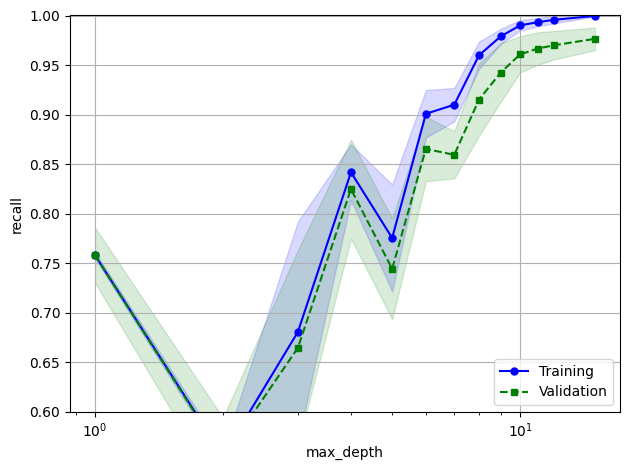

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model= DecisionTreeClassifier()
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,15]
train_scores, test_scores = validation_curve(
                estimator=tree_model,
                X=Xno_train,
                y=yno_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
param_grid = {
    "max_depth": [2,3,4,5,7,8,9],
    "min_samples_leaf": [1,2,3,4,5],
    "max_features": [1,2,3,4,5],
    "min_samples_split": [2,3,4,5,6],
    "random_state": [13]
}

grid_model= GridSearchCV(estimator= tree_model, param_grid = param_grid, scoring = "accuracy")

grid_model.fit(Xno_train, yno_train)
grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 13}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 9, # controls the maximum depth of the decision tree
                                    max_features = 4, # determines the maximum number of features to consider when looking for the best split
                                    min_samples_leaf = 1, #  specifies the minimum number of samples required to be at a leaf node
                                    min_samples_split = 3,
                                    random_state = 13)

# tree_model = DecisionTreeClassifier(criterion = 'gini',  max_depth = 9, random_state = 13)

tree_model.fit(Xno_train, yno_train)

# y_test_pred = tree_model.predict(X_test_std)
# y_train_pred = tree_model.predict(X_train)

tree_scores(tree_model, Xno_train, Xno_test_std, yno_train, yno_test)

Training:
Accuracy: 0.923
Recall: 0.948

Test:
Accuracy: 0.749
Recall: 0.573


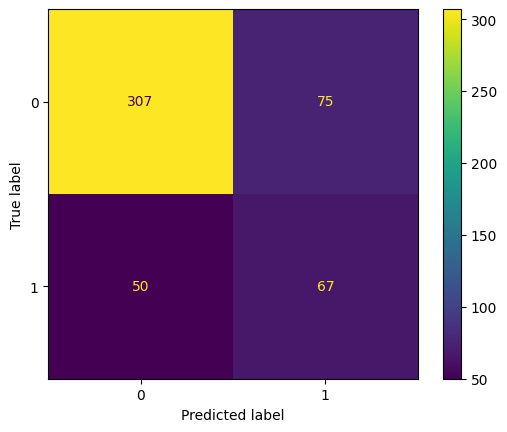

In [ ]:
# draw a confusion matrix - import dedicated packages
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
y_pred = tree_model.predict(Xno_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(yno_test, y_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

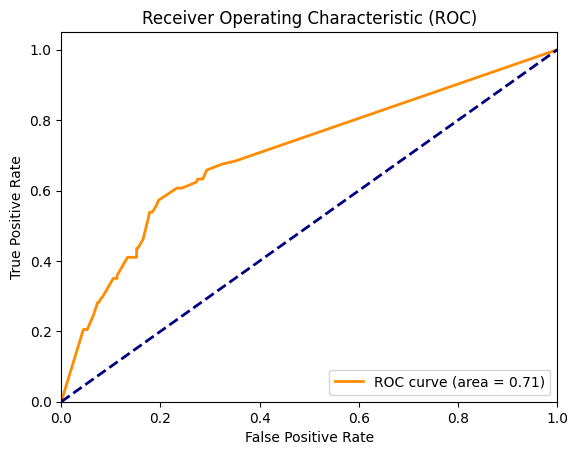

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = tree_model.predict_proba(Xno_test_std)[:, 1]  # Prawdopodobieństwo dla klasy pozytywnej
fpr, tpr, thresholds = roc_curve(yno_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

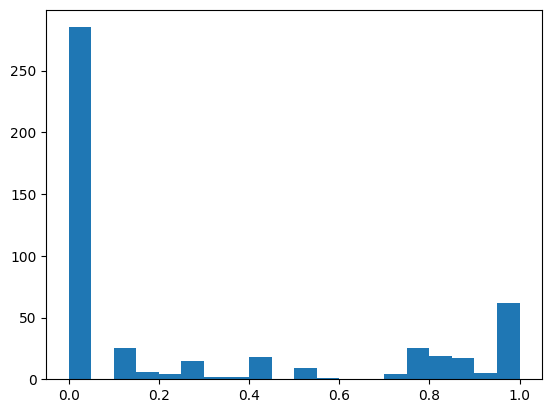

In [ ]:
pd_no_tree = tree_model.predict_proba(Xno_test_std)
pd_no_tree[:,1]

plt.hist(pd_no_tree[:,1], bins = 20)
plt.show()

# Method two

In [ ]:
new_data2 = new_data.copy()
new_data2.head()

,age_x,age_y,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,Default,value_of_square_meter
0,34,31.0,1,1,8617,149217,101.37,4.84,112,0,7556.002762
1,31,NaN,1,1,7502,138054,75.04,4.83,54,0,4810.994136
2,32,NaN,1,1,3274,73614,32.92,4.41,68,0,5886.998785
3,38,32.0,1,2,8167,157986,118.98,4.55,108,0,4709.001513
4,29,27.0,1,1,9007,290948,61.98,4.65,189,0,7590.997096


In [ ]:
new_data2['is_double'] = new_data2['age_y'].notna().astype(int)
new_data2['mean_age'] = new_data2[['age_x', 'age_y']].mean(axis=1)
new_data2.drop(['age_x', 'age_y'], axis=1,inplace=True)
new_data2.head()

,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,Default,value_of_square_meter,is_double,mean_age
0,1,1,8617,149217,101.37,4.84,112,0,7556.002762,1,32.5
1,1,1,7502,138054,75.04,4.83,54,0,4810.994136,0,31.0
2,1,1,3274,73614,32.92,4.41,68,0,5886.998785,0,32.0
3,1,2,8167,157986,118.98,4.55,108,0,4709.001513,1,35.0
4,1,1,9007,290948,61.98,4.65,189,0,7590.997096,1,28.0


In [ ]:
np.shape(new_data2)

(8543, 11)

In [ ]:
sc = StandardScaler()
X = new_data2.drop(columns = "Default")
y = new_data2["Default"]

In [ ]:
X.head()

,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,value_of_square_meter,is_double,mean_age
0,1,1,8617,149217,101.37,4.84,112,7556.002762,1,32.5
1,1,1,7502,138054,75.04,4.83,54,4810.994136,0,31.0
2,1,1,3274,73614,32.92,4.41,68,5886.998785,0,32.0
3,1,2,8167,157986,118.98,4.55,108,4709.001513,1,35.0
4,1,1,9007,290948,61.98,4.65,189,7590.997096,1,28.0


In [ ]:
np.shape(X), np.shape(y)

((8543, 10), (8543,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1, stratify = y)
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((6834, 10), (1709, 10), (6834,), (1709,))

In [ ]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_up, y_up = resample(X_train_std[y_train == 1], y_train[y_train == 1], replace=True, n_samples=X_train_std[y_train == 0].shape[0], random_state=13)

In [ ]:
X_bal_train = np.vstack((X_train_std[y_train == 0], X_up))
y_bal_train = np.hstack((y_train[y_train == 0], y_up))

In [ ]:
np.shape(X_bal_train), np.shape(X_test_std), np.shape(y_bal_train), np.shape(y_test)

((10692, 10), (1709, 10), (10692,), (1709,))

In [ ]:
X_train = X_bal_train
y_train = y_bal_train

## Logistic regression

In [ ]:
lr = LogisticRegression()

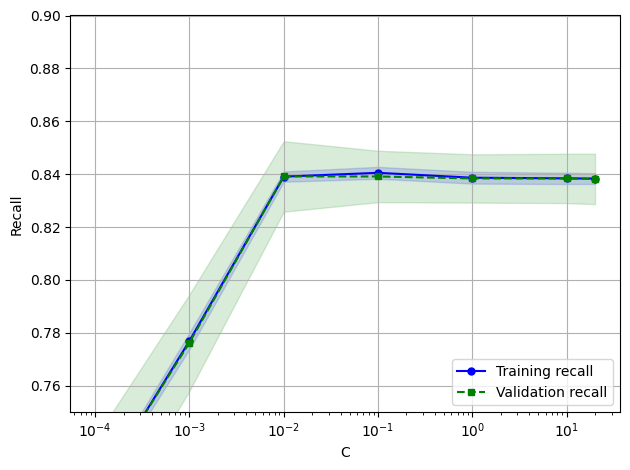

In [ ]:
param_range = [0.0001 ,0.001, 0.01, 0.1, 1.0, 10.0, 20.0]
train_scores, valid_scores = validation_curve(
                estimator=LogisticRegression(),
                X=X_train,
                y=y_train,
                param_name='C',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training recall')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, valid_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation recall')

plt.fill_between(param_range,
                 valid_mean + valid_std,
                 valid_mean - valid_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Recall')
plt.ylim([0.75, 0.9])
plt.tight_layout()

plt.show()

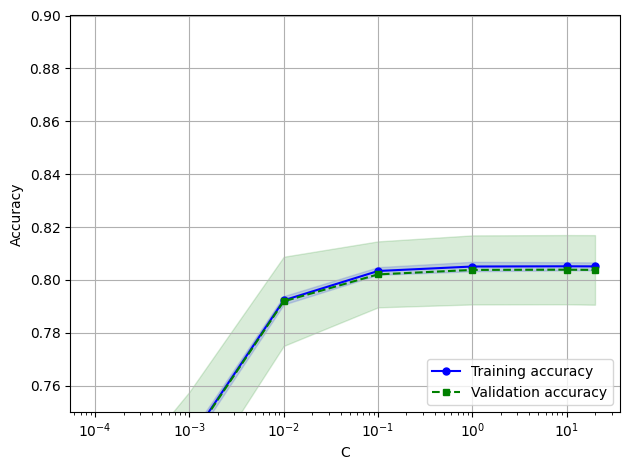

In [ ]:
param_range = [0.0001 ,0.001, 0.01, 0.1, 1.0, 10.0, 20.0]
train_scores, valid_scores = validation_curve(
                estimator=LogisticRegression(max_iter=10000),
                X=X_train,
                y=y_train,
                param_name='C',
                param_range=param_range,
                cv=10,
                scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, valid_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 valid_mean + valid_std,
                 valid_mean - valid_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim([0.75, 0.9])
plt.tight_layout()

plt.show()

In [ ]:
lr = LogisticRegression(random_state=13, C = 0.1)
lr = lr.fit(X_train, y_train)

Training:
Accuracy: 0.803
Recall: 0.839
AUC: 0.880

Test:
Accuracy: 0.785
Recall: 0.836
AUC: 0.878


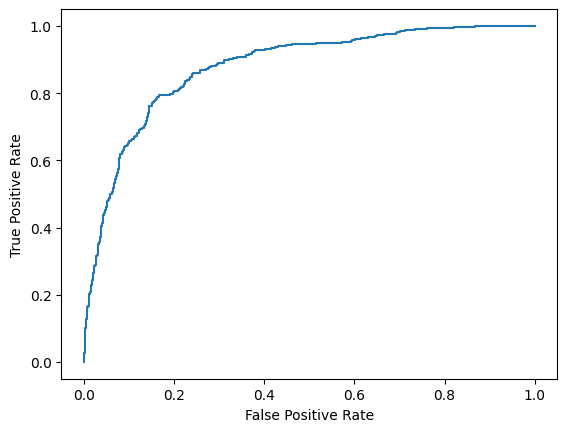

In [ ]:
scores(lr, X_train, X_test_std, y_train, y_test)

y_score = lr.decision_function(X_test_std)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fp_rate, tpr=tp_rate)
roc_display.plot();

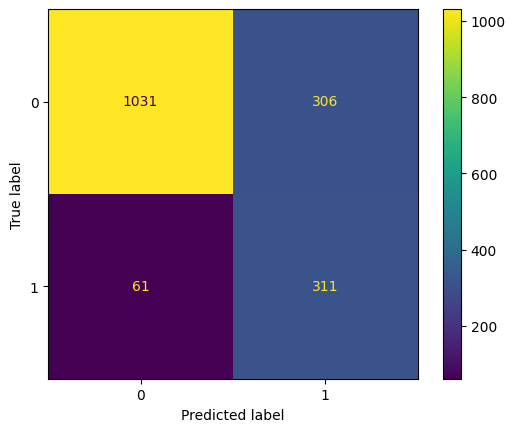

In [ ]:
# draw a confusion matrix - import dedicated packages
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
y_pred = lr.predict(X_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(y_test, y_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

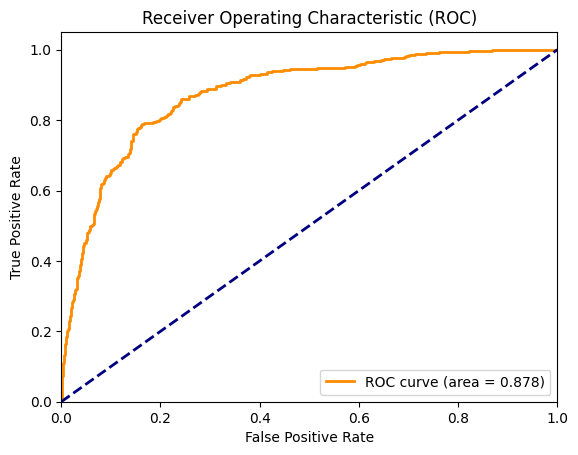

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = lr.predict_proba(X_test_std)[:, 1]  # Prawdopodobieństwo dla klasy pozytywnej
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

<BarContainer object of 10 artists>

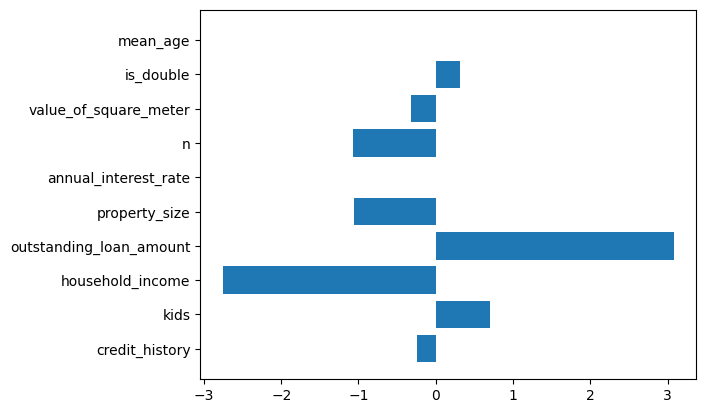

In [ ]:
plt.barh(np.arange(len(X.columns)), lr.coef_[0], tick_label = X.columns)

In [ ]:
X_test

,credit_history,kids,household_income,outstanding_loan_amount,property_size,annual_interest_rate,n,value_of_square_meter,is_double,mean_age
1090,1,2,8600,19731,68.32,4.42,8,6313.992974,1,40.5
7257,1,2,7774,189537,43.04,5.26,302,7064.010223,1,43.0
7051,1,2,6590,74281,41.74,5.36,32,7227.000479,1,31.5
635,0,2,7327,135954,67.80,4.72,119,4857.005900,1,30.0
4097,1,2,16691,907537,132.64,4.60,292,7779.998492,1,42.0
...,...,...,...,...,...,...,...,...,...,...
5303,1,2,13301,295814,114.76,4.74,105,7022.995817,1,42.5
4111,1,1,12814,528331,105.30,5.00,306,7036.001899,1,41.0
6953,1,0,4397,171863,59.00,5.24,178,5589.000000,1,35.5
8439,1,1,10771,131787,74.51,5.13,74,5700.000000,1,32.5


In [ ]:
y_test

1090    0
7257    0
7051    0
635     0
4097    1
       ..
5303    0
4111    0
6953    1
8439    0
5452    1
Name: Default, Length: 1709, dtype: int64

In [ ]:
pd_2 = lr.predict_proba(X_test_std)
pd_2[:,1]

array([0.0258921 , 0.13913599, 0.38229711, ..., 0.61133988, 0.01458109,
       0.86700574])

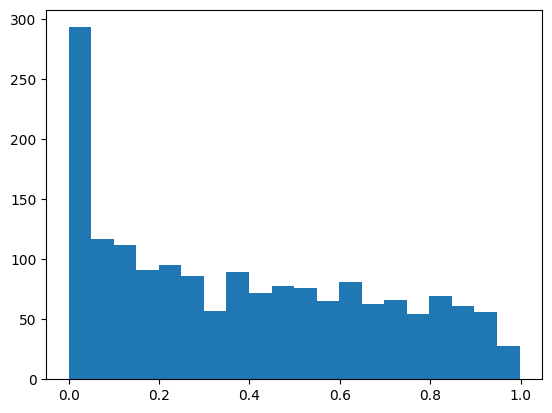

In [ ]:
pd_2 = lr.predict_proba(X_test_std)
pd_2[:,1]

plt.hist(pd_2[:,1], bins = 20)
plt.show()

## Decision tree

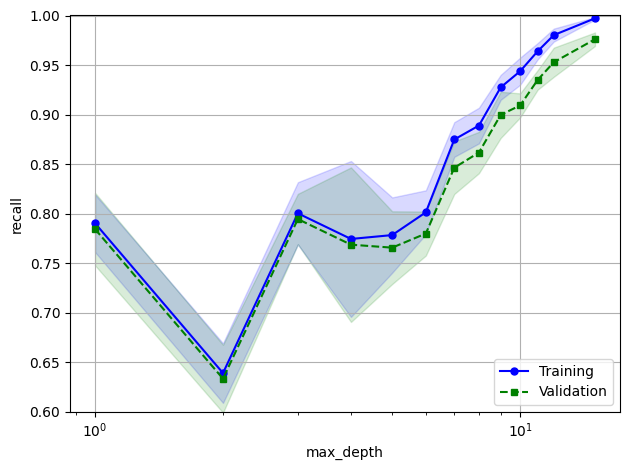

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model= DecisionTreeClassifier()
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,15]
train_scores, test_scores = validation_curve(
                estimator=tree_model,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
param_grid = {
    "max_depth": [6,7,8,9],
    "min_samples_leaf": [1,2,3,4,5],
    "max_features": [1,2,3,4,5],
    "min_samples_split": [2,3,4,5,6],
    "random_state": [13]
}

grid_model= GridSearchCV(estimator= tree_model, param_grid = param_grid, scoring = "recall")

grid_model.fit(X_train, y_train)
grid_model.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 13}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 9, # controls the maximum depth of the decision tree
                                    max_features = 5, # determines the maximum number of features to consider when looking for the best split
                                    min_samples_leaf = 1, #  specifies the minimum number of samples required to be at a leaf node
                                    min_samples_split = 3,
                                    random_state = 13)

# tree_model = DecisionTreeClassifier(criterion = 'gini',  max_depth = 9, random_state = 13)

tree_model.fit(X_train, y_train)

# y_test_pred = tree_model.predict(X_test_std)
# y_train_pred = tree_model.predict(X_train)

tree_scores(tree_model, X_train, X_test_std, y_train, y_test)

Training:
Accuracy: 0.841
Recall: 0.912

Test:
Accuracy: 0.718
Recall: 0.702


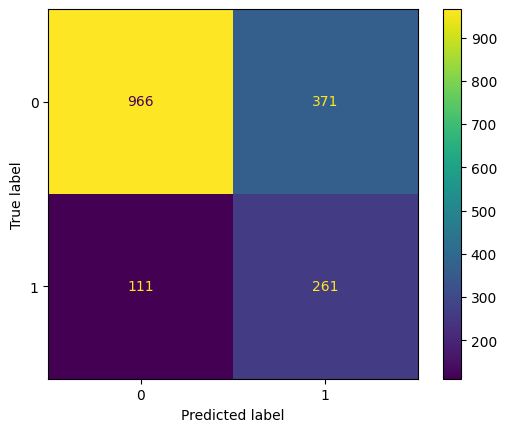

In [ ]:
# draw a confusion matrix - import dedicated packages
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
y_pred = tree_model.predict(X_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(y_test, y_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

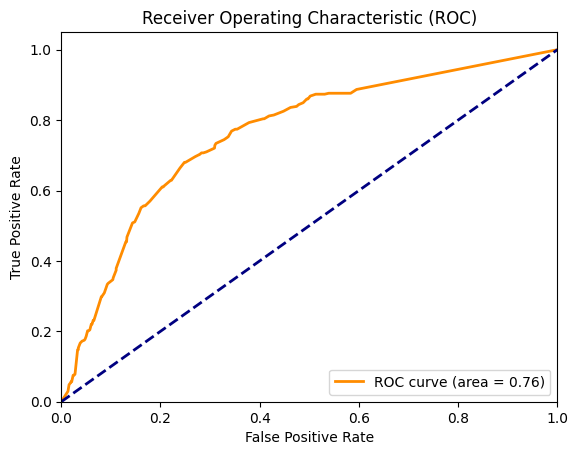

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = tree_model.predict_proba(X_test_std)[:, 1]  # Prawdopodobieństwo dla klasy pozytywnej
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

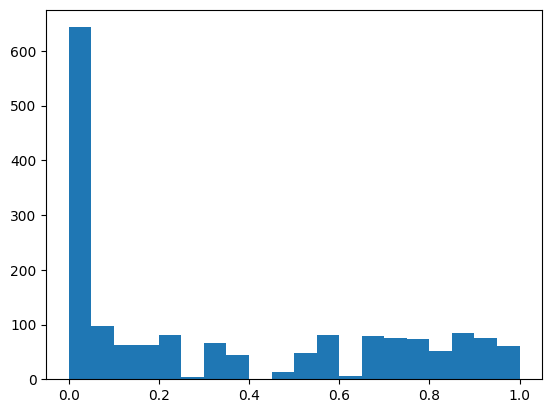

In [ ]:
pd_2_tree = tree_model.predict_proba(X_test_std)
pd_2_tree[:,1]

plt.hist(pd_2_tree[:,1], bins = 20)
plt.show()

## XGB

Additionaly we perform XGBoost.

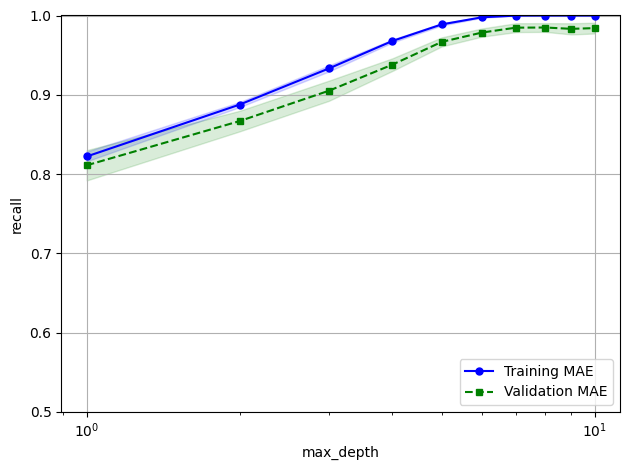

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_c = xgb.XGBClassifier()
param_range = [3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(
                estimator=xgb_c,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

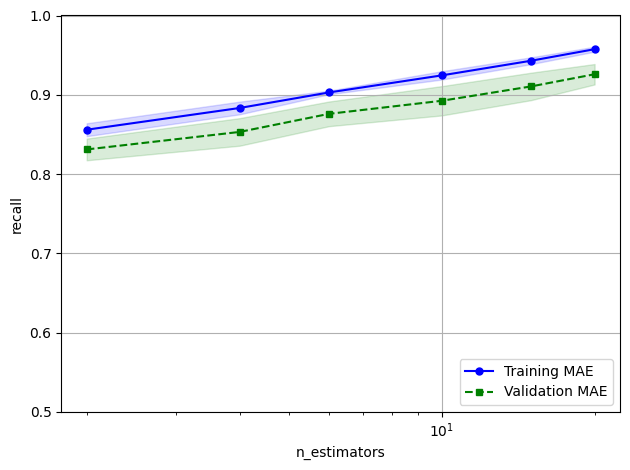

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_c = xgb.XGBClassifier()
param_range = [2,4,6,10,15,20]
train_scores, test_scores = validation_curve(
                estimator=xgb_c,
                X=X_train,
                y=y_train,
                param_name='n_estimators',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

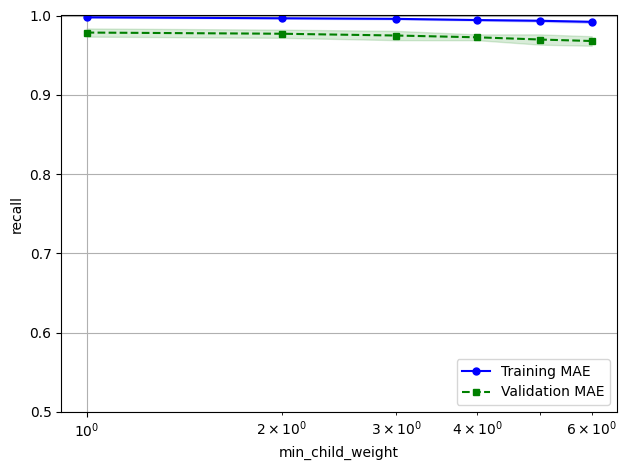

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_c = xgb.XGBClassifier()
param_range = [1, 2, 3, 4,5, 6]
train_scores, test_scores = validation_curve(
                estimator=xgb_c,
                X=X_train,
                y=y_train,
                param_name='min_child_weight',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('min_child_weight')
plt.ylabel('recall')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

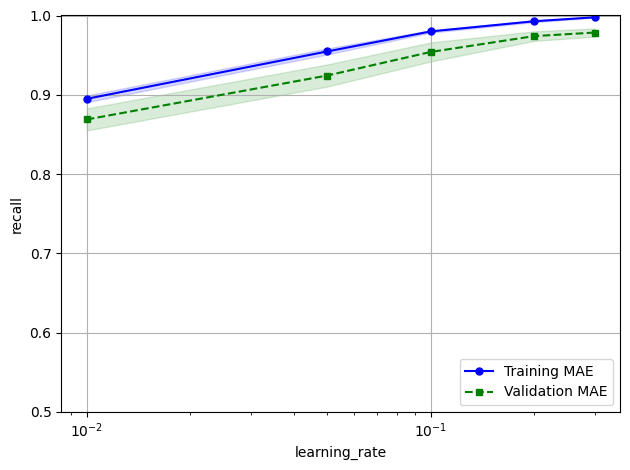

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_c = xgb.XGBClassifier()
param_range = [0.01, 0.05, 0.1, 0.2, 0.3]
train_scores, test_scores = validation_curve(
                estimator=xgb_c,
                X=X_train,
                y=y_train,
                param_name='learning_rate',
                param_range=param_range,
                cv=10,
                scoring="recall")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('learning_rate')
plt.ylabel('recall')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_c = xgb.XGBClassifier()

param_grid = {
    'booster': ['gbtree'],
    "n_estimators": [10,15,20,50],
    "max_depth": [2, 3, 4, 5, 6],
    "learning_rate": [0.015, 0.05, 0.1]
}

grid_model= GridSearchCV(estimator= xgb_c, param_grid= param_grid)

grid_model.fit(X_train, y_train)
grid_model.best_score_
grid_model.best_params_

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}

In [ ]:
import xgboost as xgb

xgb_c = xgb.XGBClassifier(booster = 'gbtree',
                         min_child_weight = 3, #??
                         n_estimators = 50, # determines the number of boosting rounds (i.e., the number of decision trees) to be built
                         max_depth = 6, # parameter controls the maximum depth of each decision tree
                         learning_rate = 0.15) # parameter scales the participation of each tree
                                                # it is used to decrease the feature weights with each boosting round, to make the boosting process more conservative

xgb_c.fit(X_train, y_train)

tree_scores(xgb_c, X_train, X_test_std, y_train, y_test)

# xgb_r.fit(X_train_std, y_train)
# y_train_pred = xgb_r.predict(X_train_std)
# y_test_pred = xgb_r.predict(X_test_std)

Training:
Accuracy: 0.941
Recall: 0.969

Test:
Accuracy: 0.839
Recall: 0.742


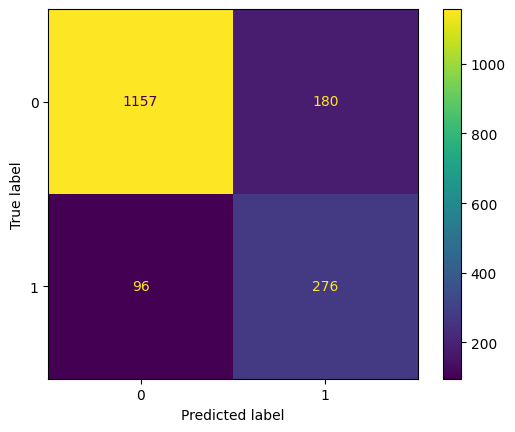

In [ ]:
# draw a confusion matrix - import dedicated packages
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# draw a confusion matrix - prepare model predictions
y_pred = xgb_c.predict(X_test_std)

# draw a confusion matrix - prepare matrix out of true and predicted results
cm = confusion_matrix(y_test, y_pred)

# draw a confusion matrix - display the matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

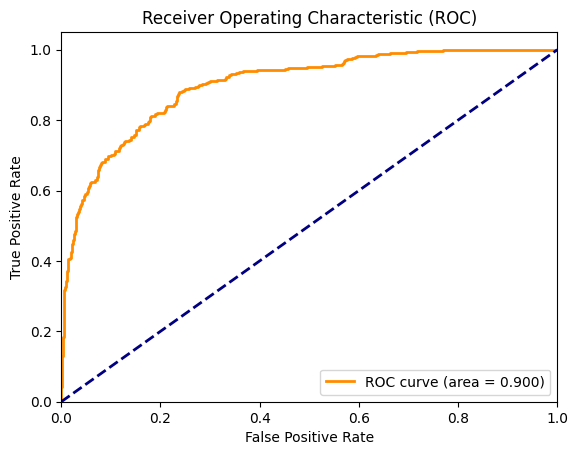

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = xgb_c.predict_proba(X_test_std)[:, 1]  # Prawdopodobieństwo dla klasy pozytywnej
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()